In [ ]:
import regex as re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import words, stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import words
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import pandas as pd

df = pd.read_csv("drive/MyDrive/School/Y3S2/AAP/combined_posts_final.csv")
df = df.drop(columns=["Post Content Start", "Link"])
print(df.shape)
df

(120124, 6)


,Title,Replies,Date,Category,Rep Count,Post Content
0,Economics Igcse,0,31 minutes ago,GCSE,0.0,Hi I'm currently taking the edexcel economics ...
1,GCSE 2004 born 1987/88 Exam board Essex,1,2 hours ago,GCSE,0.0,Does anyone know which exam board they sat the...
2,Need help with inconsistent motivation,1,3 hours ago,GCSE,0.0,Hiya. I'm in Year 11 and I did 3 GCSE exams in...
3,"I got 99999999888 at GCSE, ask me anything ‼️",29,3 hours ago,GCSE,2.0,I got:\n\nMaths - 9\nPhysics-9 \nChemistry- 9 ...
4,How to study English,11,5 hours ago,GCSE,1.0,I am getting 3s but I need to get at least 5s
...,...,...,...,...,...,...
120119,Lilians's revision tips [TSR video panel],0,21-04-2011,Study Support,1.0,[CENTER][youtube]4KRzYtES-24[/youtube]\n\nLili...
120120,Megan's revision tips [TSR video panel],0,21-04-2011,Study Support,0.0,[CENTER][youtube]KLUo6soBUfU[/youtube]\n\nMega...
120121,Nick's revision tips [TSR video panel],0,21-04-2011,Study Support,1.0,[CENTER][youtube]fjQaQMga9IY[/youtube]\n\nNick...
120122,Rory's revision tips [TSR video panel],0,21-04-2011,Study Support,9.0,[CENTER][youtube]3BFeHtuJz50[/youtube]\n\nRory...


## Data Understanding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120124 entries, 0 to 120123
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Title         120108 non-null  object 
 1   Replies       120124 non-null  object 
 2   Date          120124 non-null  object 
 3   Category      120124 non-null  object 
 4   Rep Count     119047 non-null  float64
 5   Post Content  119032 non-null  object 
dtypes: float64(1), object(5)
memory usage: 5.5+ MB


In [ ]:
df["Category"].value_counts() #Check if all categories are properly formatted and their distribution

,count
Category,
Job Experience,49924
GCSE,24960
A Level,24960
Study Support,20280


Tokenize Text for further data understanding

In [ ]:
df['tokenized words'] = "empty"
df['tokenized words'] = df['Post Content'].apply(lambda text: word_tokenize(str(text).lower()))
df.head()

,Title,Replies,Date,Category,Rep Count,Post Content,tokenized words
0,Economics Igcse,0,31 minutes ago,GCSE,0.0,Hi I'm currently taking the edexcel economics ...,"[hi, i, 'm, currently, taking, the, edexcel, e..."
1,GCSE 2004 born 1987/88 Exam board Essex,1,2 hours ago,GCSE,0.0,Does anyone know which exam board they sat the...,"[does, anyone, know, which, exam, board, they,..."
2,Need help with inconsistent motivation,1,3 hours ago,GCSE,0.0,Hiya. I'm in Year 11 and I did 3 GCSE exams in...,"[hiya, ., i, 'm, in, year, 11, and, i, did, 3,..."
3,"I got 99999999888 at GCSE, ask me anything ‼️",29,3 hours ago,GCSE,2.0,I got:\n\nMaths - 9\nPhysics-9 \nChemistry- 9 ...,"[i, got, :, \n\nmaths, -, 9\nphysics-9, \nchem..."
4,How to study English,11,5 hours ago,GCSE,1.0,I am getting 3s but I need to get at least 5s,"[i, am, getting, 3s, but, i, need, to, get, at..."


**Viewing the length of post content by percentile.**

From this, we can see that post content length is already decently long at the 5th percentile. We should remove post contents that are too short as they aren't descriptive enough to be useful. Based on this, we can remove rows with 9 or less tokens without losing a significant amount of data.

In [ ]:
import numpy as np

df['Num Tokens'] = df['tokenized words'].apply(len)
quantiles = np.arange(0, 1.05, 0.05)
percentiles = df['Num Tokens'].quantile(quantiles)
df = df.drop(columns=['Num Tokens'])

percentiles

,Num Tokens
0.00,1.0
0.05,8.0
0.10,15.0
0.15,21.0
0.20,28.0
0.25,34.0
0.30,38.0
0.35,43.0
0.40,49.0
0.45,58.0



This shows the top tokens. It is obvious from this graph that extensive cleaning should be performed, as many unhelpful stopwords and punctuations are present.

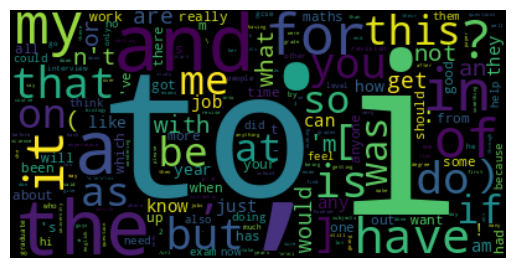

In [ ]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

all_words = [word for tokens in df['tokenized words'] for word in tokens]
freq_dist = FreqDist(all_words)

from wordcloud import WordCloud
wcloud = WordCloud().generate_from_frequencies(freq_dist)

plt.imshow(wcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Data Preparation

**Reformat Date**

In [ ]:
from datetime import datetime, timedelta

df = df[df["Date"] != "No date found"]

# Function to convert relative times to days
def convert_to_days(date_str):
    if "minutes ago" in date_str or "minute ago" in date_str:
        return 1
    elif "hour ago" in date_str or "hours ago" in date_str:
        return 1
    elif "day ago" in date_str or "days ago" in date_str:
        return int(date_str.split()[0])
    elif "week ago" in date_str or "weeks ago" in date_str:
        return int(date_str.split()[0]) * 7
    else:
        date_object = datetime.strptime(date_str, "%d-%m-%Y")
        delta = datetime.now() - date_object
        return delta.days if delta.days > 30 else 30

df["Days Since Post"] = df["Date"].apply(convert_to_days)
df = df.drop(columns=["Date"])
df.shape

(118816, 7)

**Remove short posts**

In [ ]:
df = df[df['tokenized words'].apply(len) > 9]
df = df.reset_index(drop=True)
df.shape

(112311, 7)

**Remove non float replies**

In [ ]:
df = df[pd.to_numeric(df['Replies'], errors='coerce').notna()]

In [ ]:
english_words = set(words.words())

# Function to check if a word is in the English dictionary
def is_english(word):
    return word.lower() in english_words

# Tokenization and cleaning process
lemmatizer = WordNetLemmatizer()

# Tokenize
df['tokenized words'] = df['Post Content'].apply(lambda text: word_tokenize(str(text).lower()))

# Remove non-English words
df['tokenized words'] = df['tokenized words'].apply(lambda t: [word for word in t if is_english(word)])

# Remove punctuation
df['tokenized words'] = df['tokenized words'].apply(lambda t: [word for word in t if word not in string.punctuation])

# Remove words with numbers
df['tokenized words'] = df['tokenized words'].apply(lambda t: [word for word in t if not any(char.isdigit() for char in word)])

# Remove stopwords
stopwords_set = set(stopwords.words('english'))
df['tokenized words'] = df['tokenized words'].apply(lambda t: [word for word in t if word.lower() not in stopwords_set])

# Remove single character tokens
df['tokenized words'] = df['tokenized words'].apply(lambda t: [word for word in t if len(word) > 1])

# Lemmatization
df['tokenized words'] = df['tokenized words'].apply(lambda t: [lemmatizer.lemmatize(word) for word in t])

# Remove special characters
df['tokenized words'] = df['tokenized words'].apply(lambda t: [re.sub(r'[^\w\s]', '', word) for word in t])

# Remove empty words
df['tokenized words'] = df['tokenized words'].apply(lambda t: [word for word in t if re.search(r'\S', word)])

# Whitespace trimming
df['tokenized words'] = df['tokenized words'].apply(lambda t: [word.strip() for word in t])

# Delete rows with no tokenized words
df = df[df['tokenized words'].apply(lambda x: len(x) > 0)].reset_index(drop=True)

# Remove duplicates
df = df.drop_duplicates(subset=['Post Content']).reset_index(drop=True)

df.shape

(63857, 7)

In [ ]:
# Tokenize
df['tokenized title'] = df['Title'].apply(lambda text: word_tokenize(str(text).lower()))

# Remove non-English words
df['tokenized title'] = df['tokenized title'].apply(lambda t: [word for word in t if is_english(word)])

# Remove punctuation
df['tokenized title'] = df['tokenized title'].apply(lambda t: [word for word in t if word not in string.punctuation])

# Remove words with numbers
df['tokenized title'] = df['tokenized title'].apply(lambda t: [word for word in t if not any(char.isdigit() for char in word)])

# Remove stopwords
stopwords_set = set(stopwords.words('english'))
df['tokenized title'] = df['tokenized title'].apply(lambda t: [word for word in t if word.lower() not in stopwords_set])

# Remove single character tokens
df['tokenized title'] = df['tokenized title'].apply(lambda t: [word for word in t if len(word) > 1])

# Lemmatization
df['tokenized title'] = df['tokenized title'].apply(lambda t: [lemmatizer.lemmatize(word) for word in t])

# Remove special characters
df['tokenized title'] = df['tokenized title'].apply(lambda t: [re.sub(r'[^\w\s]', '', word) for word in t])

# Remove empty words
df['tokenized title'] = df['tokenized title'].apply(lambda t: [word for word in t if re.search(r'\S', word)])

# Whitespace trimming
df['tokenized title'] = df['tokenized title'].apply(lambda t: [word.strip() for word in t])

# Delete rows with no tokenized words
df = df[df['tokenized title'].apply(lambda x: len(x) > 0)].reset_index(drop=True)

# Remove duplicates
df = df.drop_duplicates(subset=['Title']).reset_index(drop=True)

df.shape

(51725, 8)

Let's view the top 25 tokens now.

<Axes: xlabel='Samples', ylabel='Counts'>

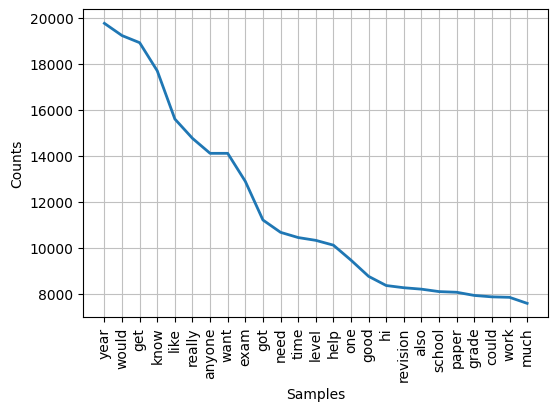

In [ ]:
all_words = [word for tokens in df['tokenized words'] for word in tokens]
freq_dist = FreqDist(all_words)

plt.figure(figsize=(6, 4))
freq_dist.plot(25, cumulative=False)

Get top 5 words for each category

In [ ]:
unique_categories = df['Category'].unique()

for category in unique_categories:
    rating_df = df[df['Category'] == category]
    words = [word for tokens in rating_df['tokenized words'] for word in tokens]
    freq_dist = FreqDist(words)

    top_words = freq_dist.most_common(5)

    print(f"Top 5 Tokenized Words for {category}'s ratings:")
    for word, count in top_words:
        print(f'{word}: {count}')
    print()

Top 5 Tokenized Words for GCSE's ratings:
year: 6210
get: 6180
would: 5499
know: 5393
like: 4815

Top 5 Tokenized Words for A Level's ratings:
year: 9091
would: 8709
level: 7767
know: 6863
want: 6802

Top 5 Tokenized Words for Job Experience's ratings:
job: 2957
anyone: 2276
would: 2002
interview: 1937
get: 1681

Top 5 Tokenized Words for Study Support's ratings:
revision: 4538
get: 4437
know: 3982
exam: 3482
really: 3353



**Relationship of Replies and Likes**

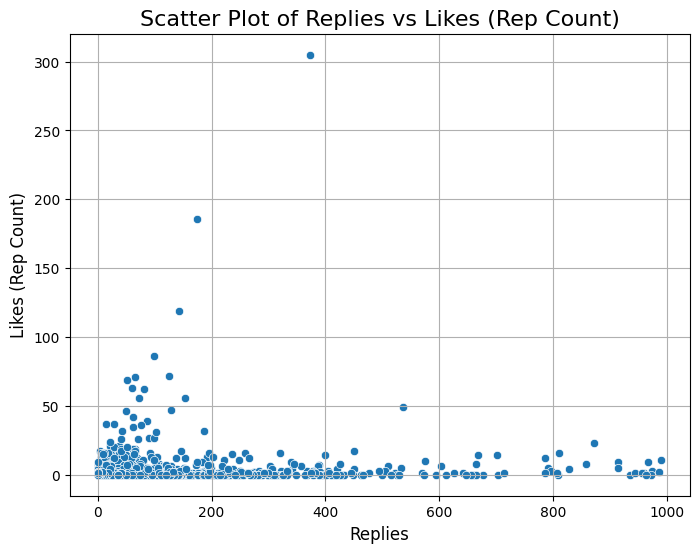

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df["Replies"] = pd.to_numeric(df["Replies"], errors='coerce')
df["Rep Count"] = pd.to_numeric(df["Rep Count"], errors='coerce')

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Replies', y='Rep Count', data=df)

plt.title('Scatter Plot of Replies vs Likes (Rep Count)', fontsize=16)
plt.xlabel('Replies', fontsize=12)
plt.ylabel('Likes (Rep Count)', fontsize=12)
plt.grid(True)

plt.show()

Let's take a peek at the posts with the most likes and posts with low likes and many replies.

In [ ]:
high_likes_df = df[df['Rep Count'] > 60]
high_replies_low_likes_df = df[(df['Replies'] > 600) & (df['Rep Count'] < 5)]

In [ ]:
# High likes
print("High Likes Posts:")
for i, content in enumerate(high_likes_df['Post Content'], start=1):
    print(f"{i}. {content}")
print('\n')

# High replies and low likes
print("High Replies, Low Likes Posts:")
for i, content in enumerate(high_replies_low_likes_df['Post Content'], start=1):
    print(f"{i}. {content}")


High Likes Posts:
1. Unofficial mark scheme \n\n1.1 arteries \n1.2 mimics the pumping of the heart and pumps blood around body so oxygen can be used for respiration to keep the persons energy up \n1.3 minimal oxygen is passed to the lungs for respiration \n1.4 statins \n1.5 stent ( mesh ) widens the artery , more blood can pass through , more oxygen for respiration \n1.6 there is the largest risk for disease H if you smoke vs don’t \n      There is the smallest risk of disease E if you smoke vs don’t \n1.7  ( diagram )\n1.8 poor diet / lack of exercise \n\n2\n2.1 nucleas \n2.2 ADE \n2.3 pancreas produces , amylase , protease , lipase , if less enzymes reach the small intestine the enzymes cannot break down starch , proteins and lipids . If there is less enzymes , this means less is broken down . So if they are not broken down , they are too large to be reabsorbed and stored . If they cannot be stored the products of proteins - amino acids increase body mass since they make proteins in 

Highly liked posts tend to be more informative and broadly relevant, while Low Likes with High Replies posts are often more specialized, discussion-driven, and focused on community building.

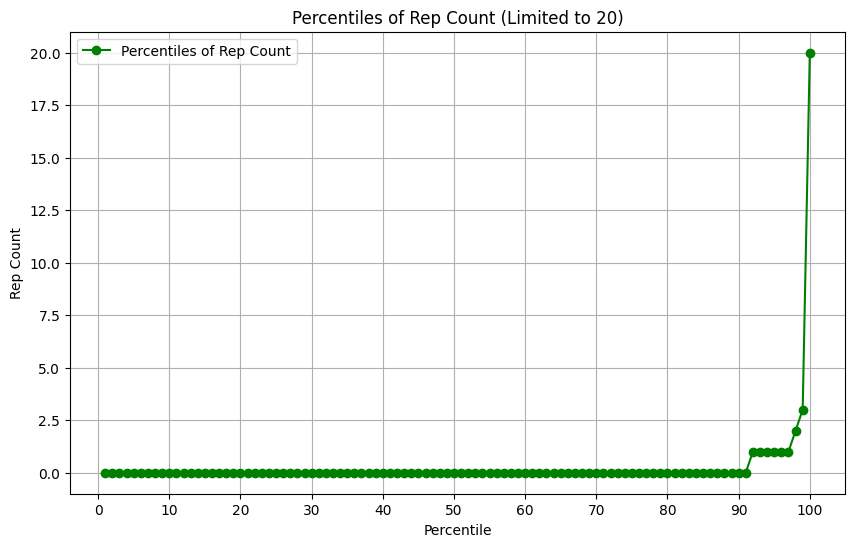

In [ ]:
reply_col = df['Rep Count']

reply_col_limited = reply_col[reply_col <= 20]

percentiles_full = list(range(1, 101))
percentile_values_full = [np.percentile(reply_col_limited, p) for p in percentiles_full]

plt.figure(figsize=(10, 6))
plt.plot(percentiles_full, percentile_values_full, marker='o', linestyle='-', color='g', label='Percentiles of Rep Count')
plt.title("Percentiles of Rep Count (Limited to 20)")
plt.xlabel("Percentile")
plt.ylabel("Rep Count")
plt.xticks(range(0, 101, 10))
plt.grid(True)
plt.legend()
plt.show()

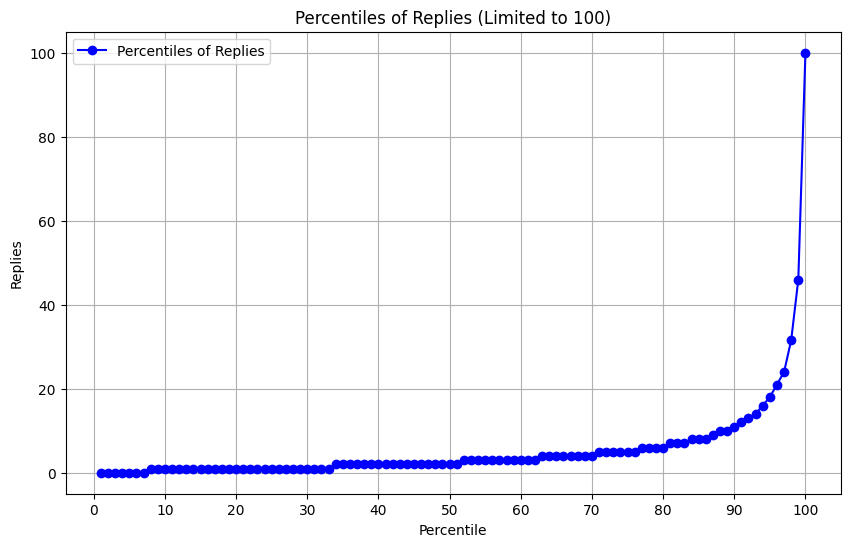

In [ ]:
reply_col = df['Replies']

reply_col_limited = reply_col[reply_col <= 100]

percentiles_full = list(range(1, 101))
percentile_values_full = [np.percentile(reply_col_limited, p) for p in percentiles_full]

plt.figure(figsize=(10, 6))
plt.plot(percentiles_full, percentile_values_full, marker='o', linestyle='-', color='b', label='Percentiles of Replies')
plt.title("Percentiles of Replies (Limited to 100)")
plt.xlabel("Percentile")
plt.ylabel("Replies")
plt.xticks(range(0, 101, 10))
plt.grid(True)
plt.legend()
plt.show()

Rules for categorising

**Popular Category** lies at the 85th percentile of replies (8 or more). If it has 0 likes, it is downgraded to Decent
**Decent Category** lies between the 70th percentile and 90th percentile (4 to 7) of replies. Decent categories are upgraded to popular if they have 3 or more likes (As these posts are more likely to pick up in popularity due to the definite feedback of high post quality).
**Unpopular Category** falls under upvotes with 3 or less replies. If they have 3 likes, they are upgraded to Decent.

-----

Unpopular posts are posts with little to no help, where there are few replies with little value added to answering the question. In some cases, these replies are extensions to the original question from the OP (Original Poster) or from a moderator asking them to move their questions to a more relevant tag to obtain more responses.

Decent threads have a discussion that embodies that of seeking advice from a friend or family member, where insights are neither abundant nor unhelpful. These posts will likely contain replies of adequate to satisfactory quality and relevance to the question.

Popular posts have a simple characteristic of having a high reply count. There are enough replies to stimulate an actual conversation with high bearing towards the original question. The comments provide vast, quality insights to the question.

In [ ]:
reply_70th_percentile = df['Replies'].quantile(0.7)
reply_90th_percentile = df['Replies'].quantile(0.85)

def categorize(row):
    if row['Replies'] >= reply_90th_percentile:
        if row['Rep Count'] == 0:
            return 'Decent'
        else:
            return 'Popular'
    elif row['Replies'] >= reply_70th_percentile:
        if row['Rep Count'] >= 3:
            return 'Popular'
        else:
            return 'Decent'
    else:
        if row['Rep Count'] >= 3:
            return 'Decent'
        else:
            return 'Unpopular'

df["Engagement"] = df.apply(categorize, axis=1)

In [ ]:
df["Engagement"].value_counts()

,count
Engagement,
Unpopular,36093
Decent,13806
Popular,1826


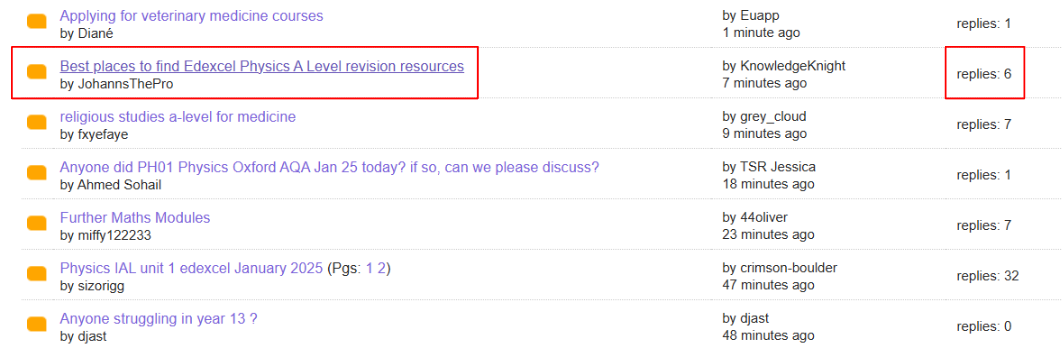

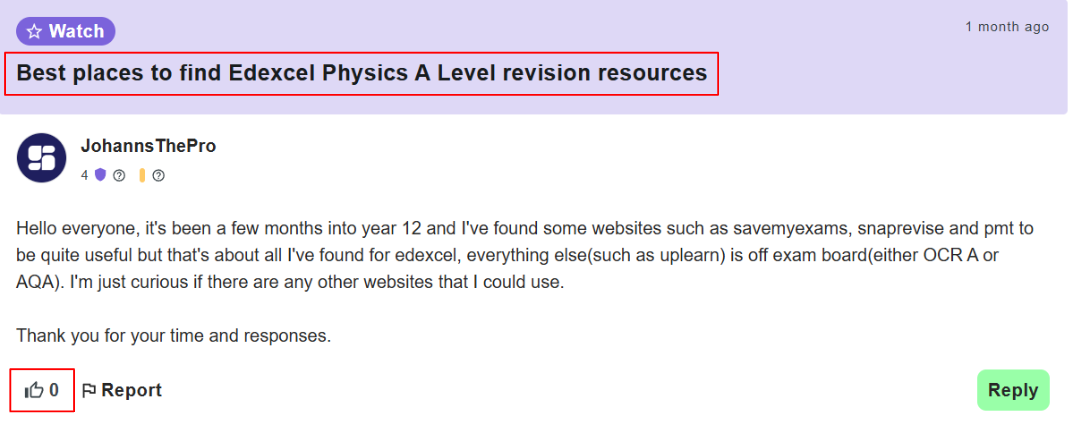

Justification for rules:

The above shows how the average thread with 0 likes look like. There are enough replies to supply quality, personalised guidance for the original poster. This means that likes are not directly linked to the engagement a post receives, however, they still directly indicate good post quality, which can also help to garner more users to reply to the question.

## Save Data

In [ ]:
df

,Title,Replies,Category,Rep Count,Post Content,tokenized words,Days Since Post,tokenized title,Engagement
0,Economics Igcse,0,GCSE,0.0,Hi I'm currently taking the edexcel economics ...,"['hi', 'currently', 'taking', 'economics', 'co...",1,['economics'],Unpopular
1,GCSE 2004 born 1987/88 Exam board Essex,1,GCSE,0.0,Does anyone know which exam board they sat the...,"['anyone', 'know', 'exam', 'board', 'sat', 'la...",1,"['born', 'exam', 'board']",Unpopular
2,Need help with inconsistent motivation,1,GCSE,0.0,Hiya. I'm in Year 11 and I did 3 GCSE exams in...,"['year', 'year', 'biology', 'astronomy', 'lite...",1,"['need', 'help', 'inconsistent', 'motivation']",Unpopular
3,"I got 99999999888 at GCSE, ask me anything ‼️",29,GCSE,2.0,I got:\n\nMaths - 9\nPhysics-9 \nChemistry- 9 ...,"['got', 'seeking', 'advice', 'feel', 'free', '...",1,"['got', 'ask', 'anything']",Popular
4,How to study English,11,GCSE,1.0,I am getting 3s but I need to get at least 5s,"['getting', 'need', 'get', 'least']",1,['study'],Popular
...,...,...,...,...,...,...,...,...,...
51720,Lilians's revision tips [TSR video panel],0,Study Support,1.0,[CENTER][youtube]4KRzYtES-24[/youtube]\n\nLili...,"['center', 'top', 'revision', 'get', 'plan', '...",5038,"['revision', 'video', 'panel']",Unpopular
51721,Megan's revision tips [TSR video panel],0,Study Support,0.0,[CENTER][youtube]KLUo6soBUfU[/youtube]\n\nMega...,"['center', 'top', 'revision', 'create', 'mind'...",5038,"['revision', 'video', 'panel']",Unpopular
51722,Nick's revision tips [TSR video panel],0,Study Support,1.0,[CENTER][youtube]fjQaQMga9IY[/youtube]\n\nNick...,"['center', 'top', 'revision', 'write', 'listen...",5038,"['nick', 'revision', 'video', 'panel']",Unpopular
51723,Rory's revision tips [TSR video panel],0,Study Support,9.0,[CENTER][youtube]3BFeHtuJz50[/youtube]\n\nRory...,"['center', 'top', 'revision', 'past', 'paper',...",5038,"['rory', 'revision', 'video', 'panel']",Decent


In [ ]:
#Save DataFrame to CSV
csv_file = "/content/drive/MyDrive/School/Y3S2/AAP/combined_posts_final_cleaned.csv"
df.to_csv(csv_file, index=False)